In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline

# 1. Single variable

## Data

Text(0, 0.5, 'y')

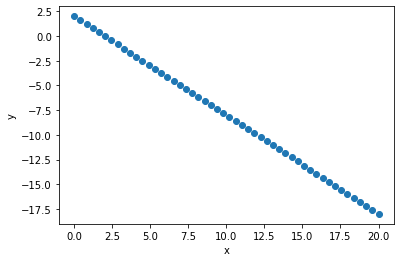

In [2]:
X=np.linspace(0,20)
Y=-X+2
#plot
plt.plot(X,Y,"o")
plt.xlabel("x")
plt.ylabel("y")

## Batch

In [3]:
def RMSProp_Batch_GD(x,y,beta=0.1,alpha=0.001,epsilon=0.001, iterations_no=100):
    losses=[]
    ths_0=[]
    ths_1=[]
    Y_predict_list=[]
   
    #1. intialize parameters
    theta_0=0
    theta_1=0
    v_0=0
    v_1=0
    
    for e in range(iterations_no):
        print('======================================================================')
        print('epoch ', e)
        
        ths_0.append(theta_0)
        ths_1.append(theta_1)
        #2. get predicted output

        y_hat=theta_0+theta_1*x
        Y_predict_list.append(y_hat)

        #3. cost function
        error=(y_hat-y)
        
        J=(np.dot(error,error))/(2*len(x))
        
        losses.append(J)  
        print('cost= ', J)
        #4. gradient

        th0_gd =((y_hat - y).sum())/(len(x))
        th1_gd = (np.dot((y_hat - y),x))/(len(x))

        #5. Update the parameters (simultaneously).
        
        
        v_0 =  beta * v_0 + (1- beta) *((th0_gd)**2)
        v_1 =  beta * v_1 + (1- beta) *((th1_gd)**2)
        
        theta_0 = theta_0 - ((alpha)/(np.sqrt(v_0) +epsilon )) * th0_gd
        theta_1 = theta_1 - ((alpha)/(np.sqrt(v_1) +epsilon )) * th1_gd
        
        print('theta 0 = ', theta_0)
        print('theta 1 = ' , theta_1)
        
        # stop condition
        if (e !=0):
            if (abs(losses[e-1] - losses[e])<0.001):
                break
            
    
    
    return y_hat,theta_0 , theta_1, ths_0, ths_1, losses, Y_predict_list

In [21]:
y_hat,theta_0 , theta_1, ths_0, ths_1, losses, Y_predict_list = RMSProp_Batch_GD(X,Y,beta=0.6,alpha=0.01,epsilon=0.001,iterations_no=1000)

epoch  0
cost=  49.34693877551021
theta 0 =  -0.015808263918352206
theta 1 =  -0.0158111703323165
epoch  1
cost=  47.42648892275923
theta 0 =  -0.028202285245290303
theta 1 =  -0.028215760463154587
epoch  2
cost=  45.9471175520233
theta 0 =  -0.03935003676108635
theta 1 =  -0.039377325387582714
epoch  3
cost=  44.63649594556683
theta 0 =  -0.049898527180140956
theta 1 =  -0.04994175160585698
epoch  4
cost=  43.413877835045234
theta 0 =  -0.06012455232971797
theta 1 =  -0.060185329286754054
epoch  5
cost=  42.244996265956715
theta 0 =  -0.0701666555872964
theta 1 =  -0.07024630518855977
epoch  6
cost=  41.112861959655675
theta 0 =  -0.08010008671422074
theta 1 =  -0.08019973367544662
epoch  7
cost=  40.00834304329374
theta 0 =  -0.08996762482911194
theta 1 =  -0.09008826072262208
epoch  8
cost=  38.92630385277135
theta 0 =  -0.09979423267058835
theta 1 =  -0.0999367597310902
epoch  9
cost=  37.863778847062896
theta 0 =  -0.10959469251554983
theta 1 =  -0.10975995635164686
epoch  10
cost

cost=  1.599981515897699
theta 0 =  -0.6930445130984083
theta 1 =  -0.709410865344663
epoch  73
cost=  1.487462875067676
theta 0 =  -0.6983413496338371
theta 1 =  -0.7179488651301992
epoch  74
cost=  1.3874610457467142
theta 0 =  -0.7021477745447727
theta 1 =  -0.7263617689880715
epoch  75
cost=  1.2994880272362037
theta 0 =  -0.703518351826125
theta 1 =  -0.7346329332197277
epoch  76
cost=  1.2228082756345282
theta 0 =  -0.7009785679744511
theta 1 =  -0.7427466461603464
epoch  77
cost=  1.1562571210256676
theta 0 =  -0.6935405983700966
theta 1 =  -0.7506922489305687
epoch  78
cost=  1.0982805111235785
theta 0 =  -0.6826894919861682
theta 1 =  -0.7584614446824931
epoch  79
cost=  1.0477612621200878
theta 0 =  -0.6706482512102692
theta 1 =  -0.7660255427393363
epoch  80
cost=  1.0043902478252555
theta 0 =  -0.6584545152431752
theta 1 =  -0.7733239862877912
epoch  81
cost=  0.9680329146317276
theta 0 =  -0.646416910562192
theta 1 =  -0.780271658175664
epoch  82
cost=  0.9383800912621002


In [22]:
r2_score(Y, y_hat)

0.953994836104475

Text(0, 0.5, 'loss')

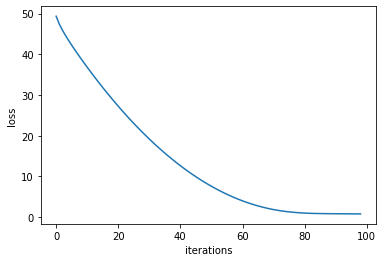

In [23]:
plt.plot(losses)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

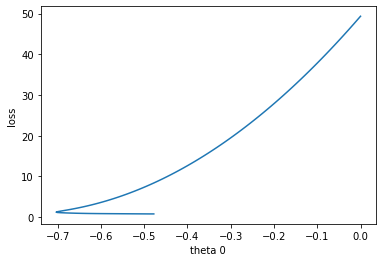

In [24]:
plt.plot(ths_0,losses)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

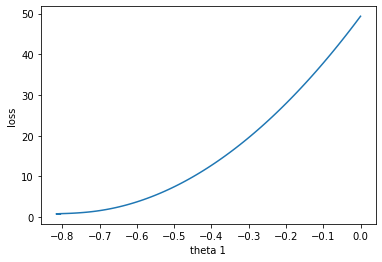

In [25]:
plt.plot(ths_1,losses)
plt.xlabel("theta 1")
plt.ylabel("loss")

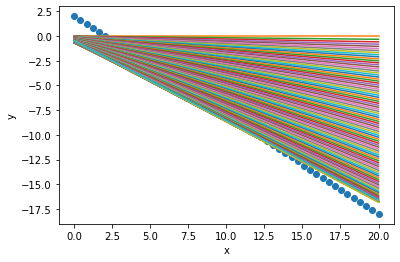

In [26]:
plt.plot(X,Y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(Y_predict_list)):
    plt.plot(X,Y_predict_list[i])
    
    
plt.show()

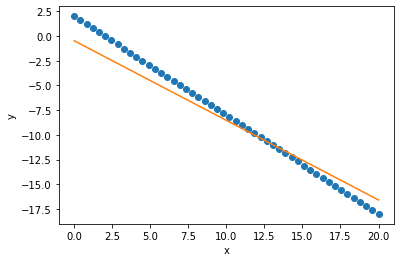

In [27]:
plt.plot(X,Y,'o')
plt.ylabel("y")
plt.xlabel("x")

plt.plot(X, y_hat)
plt.show()

## Mini Batch

In [28]:
def mini_batches(x,y,batch_size):
    x_batches=[]
    y_batches=[]
    number_of_batches=len(x)//batch_size
    
    for i in range(number_of_batches):
        x_batches.append(x[i*batch_size: (i+1)*batch_size])
        y_batches.append(y[i*batch_size : (i+1)*batch_size])
    return x_batches, y_batches
        
    

In [30]:
def RMSProp_MiniBatch_GD(x,y, batch_size=1,beta=0.01,alpha=0.001,epsilon=0.001, Epochs_no=100):
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
    
    x_batchs=[]
    y_batchs=[]
    
    #get the batches 
    x_batchs,y_batchs=mini_batches(x,y,batch_size)
    
    #1. assume intial values for parameters 
    theta_0=0
    theta_1=0
    v_0=0
    v_1=0
    
    for e in range(Epochs_no): #epochs loop
        print('==============================================')
        print('epoch ',e)
        
        Y_pred_per_epoch=[]
        for i in range(len(x_batchs)):#loop through all batches
            #2.predict 
            y_predicted= theta_0 + theta_1 * x_batchs[i]
            Y_pred_per_epoch.extend(y_predicted)
            #3.cost 
            error= y_predicted - y_batchs[i]
            J= (np.dot(error, error))/(2*batch_size)
            loss.append(J)
            
            #4.gradient
            grad_th0=( y_predicted - y_batchs[i]).sum()/(batch_size)
            grad_th1= (np.dot((y_predicted - y_batchs[i]), x_batchs[i]))/(batch_size)
            
            #update
            v_0 =  beta * v_0 + (1- beta) *((grad_th0)**2)
            v_1 =  beta * v_1 + (1- beta) *((grad_th1)**2)
            
            theta_0 = theta_0 - ((alpha)/(np.sqrt(v_0) +epsilon )) * grad_th0
            theta_1 = theta_1 - ((alpha)/(np.sqrt(v_1) +epsilon )) * grad_th1
            
            th0_list.append(theta_0)
            th1_list.append(theta_1)
            
        print('cost= ', J)
        Y_predict_list.append(Y_pred_per_epoch)
        
        #stop condition
        
        if(e!=0):
            if abs(prev_cost - J)<0.0001:
                break
        prev_cost=J
        
    return Y_pred_per_epoch,Y_predict_list ,theta_0 ,theta_1 , loss, th0_list, th1_list
        
#try batch size=5    

In [32]:
Y_pred_mini,Y_predict_list_mini ,theta_0_mini ,theta_1_mini , loss_mini, th0_list_mini, th1_list_mini=RMSProp_MiniBatch_GD(X,Y,beta=0.6,alpha=0.01,epsilon=0.001, Epochs_no=1000)

epoch  0
cost=  37.08686192555076
epoch  1
cost=  0.2727269418829044
epoch  2
cost=  0.0036003957143703725
epoch  3
cost=  0.003910773303641091
epoch  4
cost=  0.00356965508782085
epoch  5
cost=  0.002134178710614127
epoch  6
cost=  0.004174614342865121
epoch  7
cost=  0.00013926798179649194
epoch  8
cost=  0.0010856459345973796
epoch  9
cost=  0.00036553817195191543
epoch  10
cost=  0.0025083650229032824
epoch  11
cost=  0.0032527530108307063
epoch  12
cost=  0.004132185209081327
epoch  13
cost=  0.0044240648749928595
epoch  14
cost=  0.0045164800492049914


In [33]:
r2_score(Y,Y_pred_mini)

0.9655078190599253

Text(0, 0.5, 'loss')

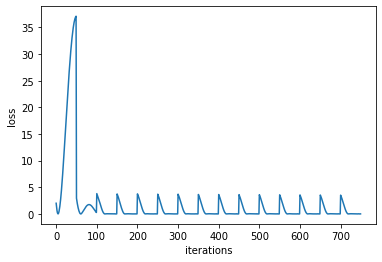

In [34]:
plt.plot(loss_mini)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

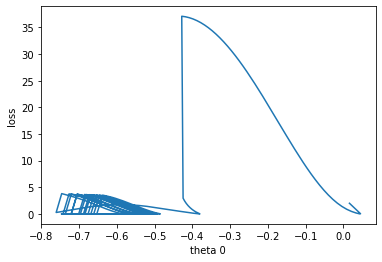

In [35]:
plt.plot(th0_list_mini,loss_mini)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

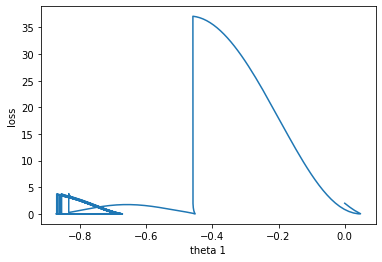

In [36]:
plt.plot(th1_list_mini,loss_mini)
plt.xlabel("theta 1")
plt.ylabel("loss")

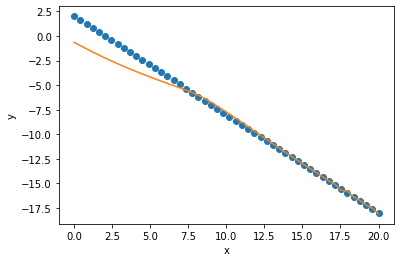

In [37]:
plt.plot(X,Y,'o')
plt.ylabel("y")
plt.xlabel("x")

plt.plot(X, Y_pred_mini)
plt.show()

# 2. Multi variable

In [38]:
f=open("data/MultipleLR.csv")
multi_data=np.loadtxt(f,delimiter=",")
x_0=np.ones((len(multi_data[:,0]) , 1))
multi_X=np.concatenate((x_0, multi_data[:,:3].reshape(len(multi_data[:,0]) , 3)),axis=1)
multi_X.shape

(25, 4)

In [39]:
multi_Y=multi_data[:,3]
multi_Y=multi_Y.reshape((multi_Y.shape[0],1))
multi_Y.shape

(25, 1)

In [41]:
def RMSProp_MiniBatch_GD_Multi(x,y, batch_size=1,beta=0.01,alpha=0.0001,epsilon=0.001, Epochs_no=100):
    loss=[]
    Y_predict_list=[]
    
    x_batchs=[]
    y_batchs=[]
    
    #get the batches 
    x_batchs,y_batchs=mini_batches(x,y,batch_size)
    
    #1. assume intial values for parameters 
    theta_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    v_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    thetas=theta_vector.T
    
    for e in range(Epochs_no): #epochs loop
        print('==============================================')
        print('epoch ',e)
        
        Y_pred_per_epoch=[]
        for i in range(len(x_batchs)):#loop through all batches
            #2.predict 
            y_predicted=np.dot(x_batchs[i],theta_vector)
            Y_pred_per_epoch.extend(y_predicted)
            #3.cost 
            error= y_predicted - y_batchs[i]
            J= (np.dot(error.T, error))/(2*batch_size)
            loss.append(J[0][0])
            
    
            #4. gradient vector
            gradient_vector=np.zeros(x_batchs[i].shape[1])
            gradient_vector=(np.dot(x_batchs[i].T,(y_predicted - y_batchs[i]) ))/(batch_size)

            #5. update parameters
           
            v_vector = beta * v_vector +(1-beta) *  np.square(gradient_vector)
            
            theta_vector = theta_vector - ((alpha)/(np.sqrt(v_vector) +epsilon )) * gradient_vector
        
            thetas=np.vstack([thetas, theta_vector.T])
        
             
            
        print('cost= ', J[0][0])
        Y_predict_list.append(Y_pred_per_epoch)
        #stop condition
        
        if(e!=0):
            if abs(prev_cost - J)<0.001:
                break
        prev_cost=J
        
        
    return Y_pred_per_epoch, theta_vector, thetas,loss
            
#batch size = 5    
    

In [42]:
Y_pred_multi, theta_vector_multi, thetas_multi,loss_multi=RMSProp_MiniBatch_GD_Multi(multi_X,multi_Y,beta=0.6,alpha=0.01,epsilon=0.001, Epochs_no=1000)

epoch  0
cost=  7758.881043384822
epoch  1
cost=  1754.762716698273
epoch  2
cost=  5.916808043271909
epoch  3
cost=  1.1016320425154844
epoch  4
cost=  1.0862724227361258
epoch  5
cost=  1.070984574216323
epoch  6
cost=  1.0557668560482987
epoch  7
cost=  1.0406218328809402
epoch  8
cost=  1.0255520696457079
epoch  9
cost=  1.0105601281754266
epoch  10
cost=  0.9956485637547596
epoch  11
cost=  0.9808199216121132
epoch  12
cost=  0.9660767333669499
epoch  13
cost=  0.9514215134452145
epoch  14
cost=  0.9368567554776399
epoch  15
cost=  0.9223849286962184
epoch  16
cost=  0.9080084743459831
epoch  17
cost=  0.893729802130153
epoch  18
cost=  0.8795512867055147
epoch  19
cost=  0.865475264250106
epoch  20
cost=  0.8515040291219887
epoch  21
cost=  0.8376398306298468
epoch  22
cost=  0.8238848699389099
epoch  23
cost=  0.8102412971325171
epoch  24
cost=  0.7967112084526293
epoch  25
cost=  0.783296643741871
epoch  26
cost=  0.7699995841090603
epoch  27
cost=  0.756821949840796
epoch  28


cost=  0.12630982211635713
epoch  129
cost=  0.12502388092151334
epoch  130
cost=  0.12376826579251993
epoch  131
cost=  0.12254194478567784
epoch  132
cost=  0.12134392919059368
epoch  133
cost=  0.12017327154079391
epoch  134
cost=  0.11902906370988157
epoch  135
cost=  0.11791043509254268
epoch  136
cost=  0.11681655086713624
epoch  137
cost=  0.11574661033817181
epoch  138
cost=  0.11469984535604344
epoch  139
cost=  0.11367551881073756
epoch  140
cost=  0.11267292319750487
epoch  141
cost=  0.11169137925106093


In [43]:
r2_score(multi_Y, Y_pred_multi)

0.9792160536603303

Text(0, 0.5, 'loss')

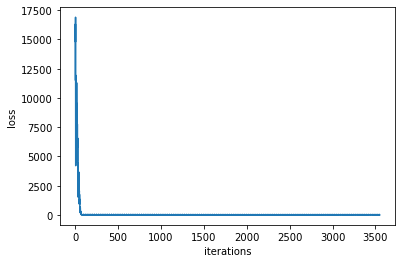

In [44]:
#loss vs. iterations
plt.plot(loss_multi) # alpha is important here ---> make it small as possible
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

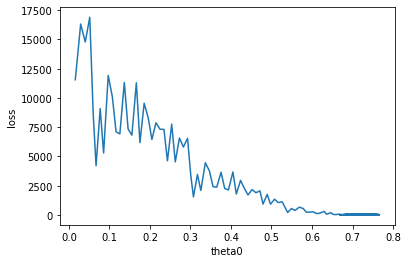

In [45]:
plt.plot(thetas_multi[1:,0],loss_multi)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

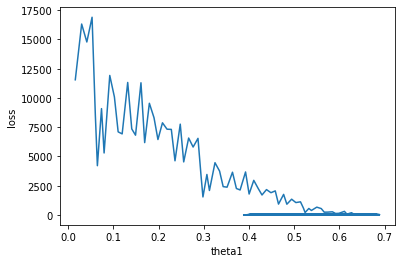

In [46]:
plt.plot(thetas_multi[1:,1],loss_multi)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

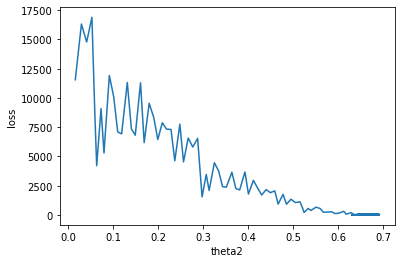

In [47]:
plt.plot(thetas_multi[1:,2],loss_multi)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

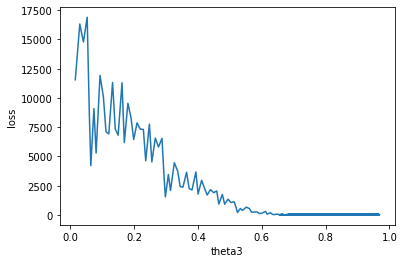

In [48]:
plt.plot(thetas_multi[1:,3],loss_multi)
plt.xlabel("theta3")
plt.ylabel("loss")